### Множественная линейная регрессия на чистых данных

#### Цель работы

Познакомиться с основными приемами работы с множественными регрессионными моделями с использованием библиотеки sklearn. 

#### Содержание работы

1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
2. Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.
3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.
5. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.
6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

#### Методические указания

Для начала работы как всегда выполним стандартный импорт необходимых библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
x = pd.read_csv("13_x.csv", header=None)
y = pd.read_csv("13_y.csv", header=None)
x.head()

,0,1,2,3,4,5,6
0,0.156597,-0.393695,0.140566,-1.051606,-0.816512,-0.023982,-0.616483
1,2.060488,-0.450985,-0.447241,-0.614818,0.139282,-0.356213,-0.541872
2,0.785716,-2.099845,-0.982133,-0.019451,-0.086523,1.384955,1.690400
3,0.956048,-0.197919,2.597384,1.149955,-0.378604,1.199733,2.723211
4,-0.580466,0.469350,-0.032498,0.133904,-0.729713,0.948163,0.642029


In [3]:
x.shape, y.shape

((270, 7), (270, 1))

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       270 non-null    float64
 1   1       270 non-null    float64
 2   2       270 non-null    float64
 3   3       270 non-null    float64
 4   4       270 non-null    float64
 5   5       270 non-null    float64
 6   6       270 non-null    float64
dtypes: float64(7)
memory usage: 14.9 KB


Создадим модель линейной регрессии от одной переменной:

In [5]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_

array([[87.57105001]])

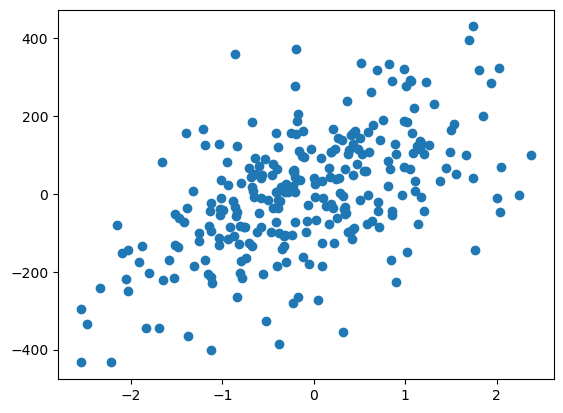

In [6]:
binary.predict(x[[1]])
plt.scatter(x[1], y)

Равномерное распределение точек от минимального до максимального по _X_:

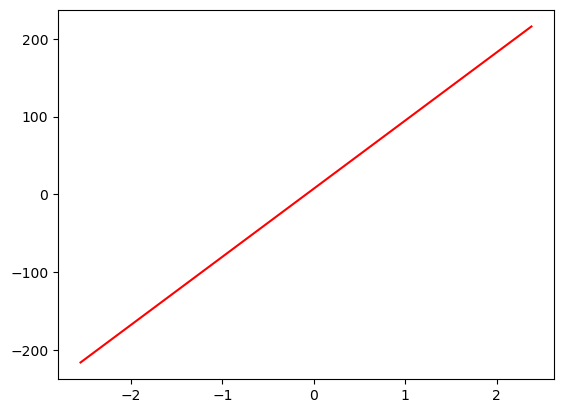

In [7]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

Для оценки качества построенной регрессии воспользуемся коэффициентом детерминации (R2-score).

In [8]:
binary.score(x[[1]], y)

0.3067923953877645

Для построения множественной регрессии выполним те же шаги, но будем использовать полный датасет:

In [9]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9962083205829867

Теперь точность возросла до 0.99, что говорит о почти идеальной модели. Вообще чем больше информации мы подаем на вход моделям машинного обучения, тем на более сильный результат мы можем рассчитывать.

В модели множественной регрессии уже не удасся построить такой красивый и однозначный график. Для того, чтобы хоть как-то увидеть, как модель соотносится с точками, можно построить график зависимости теоретических значений от эмпирических, то есть как предсказанные значения отличаются от истинных:


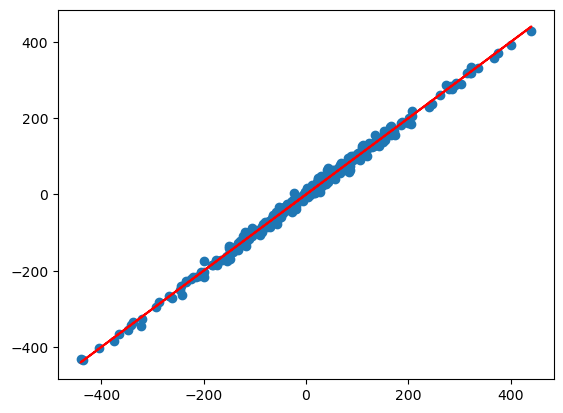

In [10]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

Дополнительно на этом графике мы добавили линию _y=y_. Это всегда будет прямая, даже если мы будем использовать нелинейные модели. Обратите внимание, что на данном графике по обоим осям _Y_ - то есть целевая переменная:

Такой график наряду с диагностическими кривыми можно использовать для диагностики многомерных задач регресии.

#### Задания для самостоятельного выполнения

1. Сравните коэффициенты парной и множественной регрессии до и после обучения. 
1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.
1. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.
2. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.
3. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.
4. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.


#### Сравним коэффициенты парной и множественной регрессии

Для получения коэффициентов до обучения введём переменные ***coef_binary_before*** и ***coef_multiple_before*** выше, до обучения моделей.

Сравнение коэффициентов парной и множественной регрессии до и после обучения:

In [11]:
coef_binary = (binary.coef_, binary.intercept_)
print("Коэффициенты парной регрессии:", coef_binary)

coef_multiple = (multiple.coef_, multiple.intercept_)
print("Коэффициенты множественной регрессии:", coef_multiple)

Коэффициенты парной регрессии: (array([[87.57105001]]), array([7.42986026]))
Коэффициенты множественной регрессии: (array([[42.43197797, 88.42048429, 93.41664666, 16.36480541, -0.22478891,
        71.77597112,  1.71585101]]), array([0.05555302]))


#### Построим парные регрессии от каждого атрибута с целевой переменной.

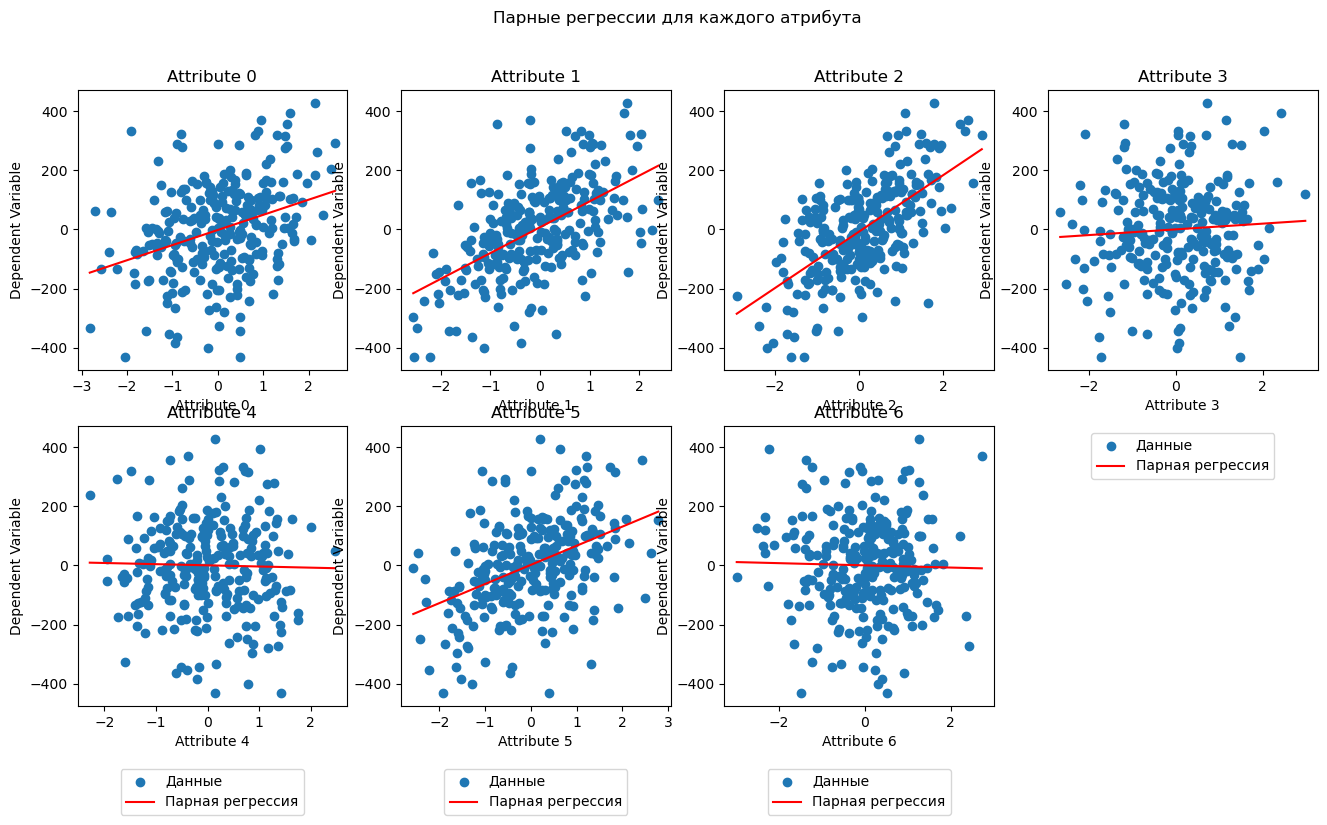

In [69]:
num_attributes = x.shape[1]

num_plots = len(x.columns)
num_rows = (num_plots - 1) // 4 + 1
subtitles = [f'Attribute {i}' for i in range(num_attributes)]
fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
fig.suptitle('Парные регрессии для каждого атрибута')

for i in range(num_attributes):
    row = i // 4
    col = i % 4
    
    binary = LinearRegression()
    binary.fit(x[[i]], y)

    axes[row, col].scatter(x[i], y, label='Данные')

    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    yy = binary.predict(xx)
    axes[row, col].plot(xx, yy, c='r', label='Парная регрессия')
    
    axes[row, col].set_title(subtitles[i])
    axes[row, col].set_xlabel(f'Attribute {i}')
    axes[row, col].set_ylabel('Dependent Variable')
    axes[row, col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))


for i in range(num_plots, num_rows * 4):
    fig.delaxes(axes[num_rows - 1, i % 4])
    
plt.show()

#### Для целевой переменной и каждого из признаков построим полиномиальную регрессию второго, третьего и десятого порядков. 

Attribute 0, Degree 2, R^2 = 0.12: R^2 = 0.12
Attribute 0, Degree 3, R^2 = 0.13: R^2 = 0.13
Attribute 0, Degree 10, R^2 = 0.14: R^2 = 0.14
Attribute 1, Degree 2, R^2 = 0.32: R^2 = 0.32
Attribute 1, Degree 3, R^2 = 0.32: R^2 = 0.32
Attribute 1, Degree 10, R^2 = 0.33: R^2 = 0.33
Attribute 2, Degree 2, R^2 = 0.39: R^2 = 0.39
Attribute 2, Degree 3, R^2 = 0.40: R^2 = 0.40
Attribute 2, Degree 10, R^2 = 0.41: R^2 = 0.41
Attribute 3, Degree 2, R^2 = 0.00: R^2 = 0.00
Attribute 3, Degree 3, R^2 = 0.01: R^2 = 0.01
Attribute 3, Degree 10, R^2 = 0.04: R^2 = 0.04
Attribute 4, Degree 2, R^2 = 0.00: R^2 = 0.00
Attribute 4, Degree 3, R^2 = 0.00: R^2 = 0.00
Attribute 4, Degree 10, R^2 = 0.03: R^2 = 0.03
Attribute 5, Degree 2, R^2 = 0.19: R^2 = 0.19
Attribute 5, Degree 3, R^2 = 0.19: R^2 = 0.19
Attribute 5, Degree 10, R^2 = 0.22: R^2 = 0.22
Attribute 6, Degree 2, R^2 = 0.01: R^2 = 0.01
Attribute 6, Degree 3, R^2 = 0.01: R^2 = 0.01
Attribute 6, Degree 10, R^2 = 0.05: R^2 = 0.05


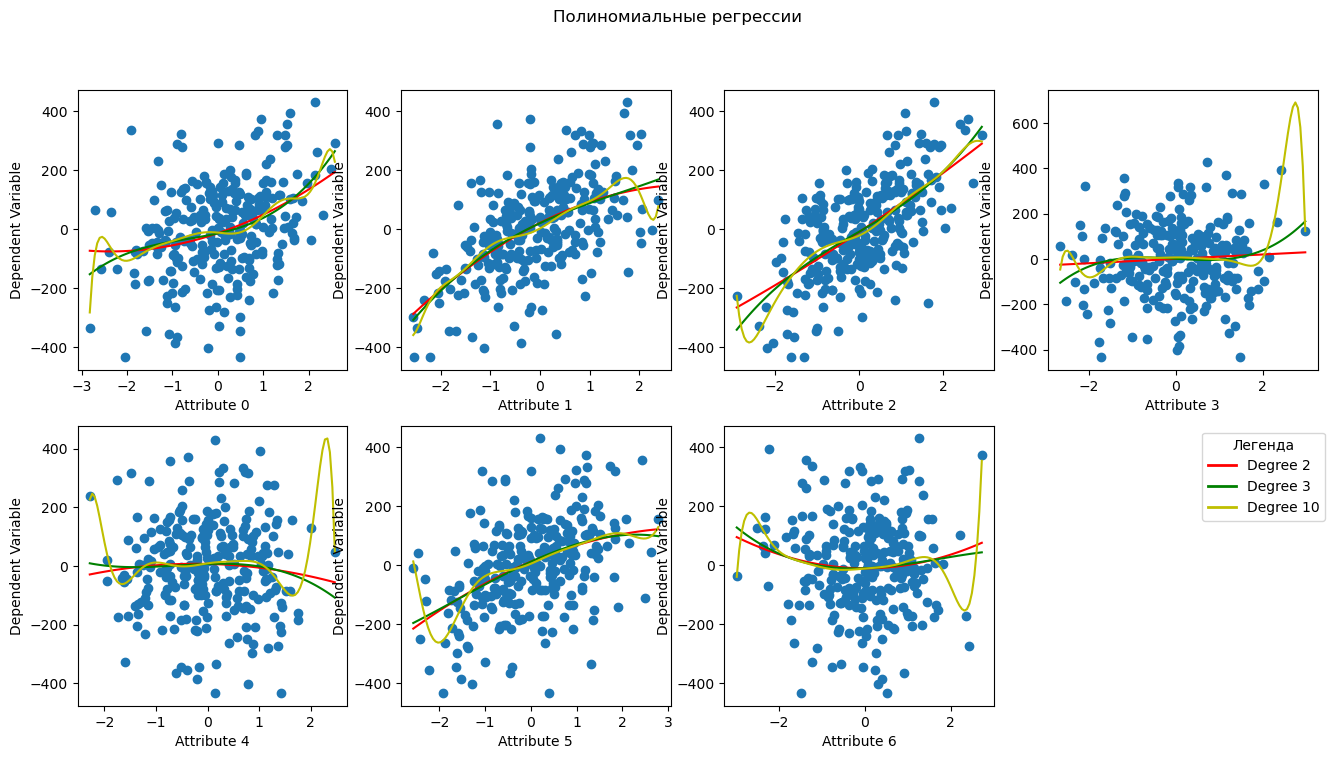

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

degrees = [2, 3, 10]

num_plots = len(x.columns)
num_rows = (num_plots - 1) // 4 + 1
fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
fig.suptitle('Полиномиальные регрессии')

handles, labels = [], []

colors = {2: 'r', 3: 'g', 10: 'y'}

for i in range(num_plots):
    row = i // 4
    col = i % 4
    
    x_feature = x[[i]]
    
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        x_poly = poly.fit_transform(x_feature)
        
        poly_reg = LinearRegression()
        poly_reg.fit(x_poly, y)
        y_pred = poly_reg.predict(x_poly)

        r2 = poly_reg.score(x_poly, y)

        description = f'Degree {degree}, R^2 = {r2:.2f}'
        print(f'Attribute {i}, {description}: R^2 = {r2:.2f}')
        
        xx = np.linspace(x_feature.min(), x_feature.max(), 100)
        xx_poly = poly.transform(xx.reshape(-1, 1))
        yy = poly_reg.predict(xx_poly)
        
        color = colors[degree]
        axes[row, col].plot(xx, yy, label=description, color=color)
    
    axes[row, col].scatter(x_feature, y, label='Данные')
    #axes[row, col].set_title(f'Attribute {i}')
    axes[row, col].set_xlabel(f'Attribute {i}')
    axes[row, col].set_ylabel('Dependent Variable')
    
for degree in degrees:
    handles.append(plt.Line2D([0], [0], color=colors[degree], lw=2))
    labels.append(f'Degree {degree}')

for i in range(num_plots, num_rows * 4):
    fig.delaxes(axes[num_rows - 1, i % 4])
    
plt.legend(handles, labels, title="Легенда", loc='upper center', bbox_to_anchor=(2.0, 1.0))
plt.show()


При визуальной оценке графиков можно заметить, что модель со степенью полинома 10 соответствует данным лучше, чем модели со степенью 2 и 3. 
Оценка качества построенных моделей показала, что полином 10 степени предсказывает значения лучше, чем полиномы меньших степеней, но значения качества всё равно очень низки. 

#### Построим сводную таблицу показателей точности всех построенных моделей. Сделаем вывод, какие модели переобученнные, какие - недообученные.

Для оценки точности моделей (линейной регрессии, множественной регрессии, полиномиальной регрессии для всех атрибутов и линейной регрессии для всех атрибутов) будем использовать различные метрики, такие как коэффициент детерминации (R-squared), средняя абсолютная ошибка (MAE), средняя квадратичная ошибка (MSE).

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Линейная регрессия
linear_reg_all = LinearRegression()
linear_reg_all.fit(x, y)
y_pred_linear_all = linear_reg_all.predict(x)
r2_linear_all = r2_score(y, y_pred_linear_all)
mae_linear_all = mean_absolute_error(y, y_pred_linear_all)
mse_linear_all = mean_squared_error(y, y_pred_linear_all)

# Множественная регрессия
multiple_reg = LinearRegression()
multiple_reg.fit(x, y)
y_pred_multiple = multiple_reg.predict(x)
r2_multiple = r2_score(y, y_pred_multiple)
mae_multiple = mean_absolute_error(y, y_pred_multiple)
mse_multiple = mean_squared_error(y, y_pred_multiple)

# Полиномиальная регрессия для всех атрибутов 
degrees = [2, 3, 10]
r2_poly, mae_poly, mse_poly = {}, {}, {}
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly, y)
    y_pred_poly = poly_reg.predict(x_poly)
    r2_poly[degree] = r2_score(y, y_pred_poly)
    mae_poly[degree] = mean_absolute_error(y, y_pred_poly)
    mse_poly[degree] = mean_squared_error(y, y_pred_poly)

results = {}
results = pd.DataFrame(columns=['Модель', 'R^2', 'MAE', 'MSE'])

linear_all_result = pd.DataFrame({'Модель': ['Линейная регрессия'], 'R^2': [r2_linear_all], 'MAE': [mae_linear_all], 'MSE': [mse_linear_all]})
results = pd.concat([results, linear_all_result], ignore_index=True)

multiple_result = pd.DataFrame({'Модель': ['Множественная регрессия'], 'R^2': [r2_multiple], 'MAE': [mae_multiple], 'MSE': [mse_multiple]})
results = pd.concat([results, multiple_result], ignore_index=True)

for degree in degrees:
    poly_result = pd.DataFrame({'Модель': [f'Полином {degree}'], 'R^2': [r2_poly[degree]], 'MAE': [mae_poly[degree]], 'MSE': [mse_poly[degree]]})
    results = pd.concat([results, poly_result], ignore_index=True)

results


,Модель,R^2,MAE,MSE
0,Линейная регрессия,0.996208,7.619105e+00,9.382953e+01
1,Множественная регрессия,0.996208,7.619105e+00,9.382953e+01
2,Полином 2,0.996706,7.099768e+00,8.151952e+01
3,Полином 3,0.997932,5.524258e+00,5.118280e+01
4,Полином 10,1.000000,2.141004e-10,4.122657e-19


Модели с близкими к 1 значениями R^2 и низкими значениями MAE и MSE обычно считаются лучшими. 
При обучении моделей без деления датасета на тренировочный и тестовый набор все показали себя достаточно высоко. 

In [39]:
from sklearn.model_selection import train_test_split

# Разбиваем данные на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Линейная регрессия
linear_reg_all = LinearRegression()
linear_reg_all.fit(x_train, y_train)
y_pred_linear_all = linear_reg_all.predict(x_test)
r2_linear_all = r2_score(y_test, y_pred_linear_all)
mae_linear_all = mean_absolute_error(y_test, y_pred_linear_all)
mse_linear_all = mean_squared_error(y_test, y_pred_linear_all)

# Множественная регрессия
multiple_reg = LinearRegression()
multiple_reg.fit(x_train, y_train)
y_pred_multiple = multiple_reg.predict(x_test)
r2_multiple = r2_score(y_test, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)

# Полиномиальная регрессия для всех атрибутов (перебор степеней полинома)
degrees = [2, 3, 10]
r2_poly, mae_poly, mse_poly = {}, {}, {}
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x_train)
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly, y_train)
    x_poly_test = poly_features.transform(x_test)
    y_pred_poly = poly_reg.predict(x_poly_test)
    r2_poly[degree] = r2_score(y_test, y_pred_poly)
    mae_poly[degree] = mean_absolute_error(y_test, y_pred_poly)
    mse_poly[degree] = mean_squared_error(y_test, y_pred_poly)

results = {}
results = pd.DataFrame(columns=['Модель', 'R^2', 'MAE', 'MSE'])

linear_all_result = pd.DataFrame({'Модель': ['Линейная регрессия'], 'R^2': [r2_linear_all], 'MAE': [mae_linear_all], 'MSE': [mse_linear_all]})
results = pd.concat([results, linear_all_result], ignore_index=True)

multiple_result = pd.DataFrame({'Модель': ['Множественная регрессия'], 'R^2': [r2_multiple], 'MAE': [mae_multiple], 'MSE': [mse_multiple]})
results = pd.concat([results, multiple_result], ignore_index=True)

for degree in degrees:
    poly_result = pd.DataFrame({'Модель': [f'Полином {degree}'], 'R^2': [r2_poly[degree]], 'MAE': [mae_poly[degree]], 'MSE': [mse_poly[degree]]})
    results = pd.concat([results, poly_result], ignore_index=True)

results

,Модель,R^2,MAE,MSE
0,Линейная регрессия,0.994924,8.004974,1.092652e+02
1,Множественная регрессия,0.994924,8.004974,1.092652e+02
2,Полином 2,0.992804,9.970291,1.548925e+02
3,Полином 3,0.979402,16.212777,4.433752e+02
4,Полином 10,-4485.885066,2908.011271,9.658272e+07


Модели с разделенным датасетом показали результаты хуже. Высокие значения средней абсолютной ошибки и отрицательное значение точности в случае полинома 10 степени может свидетельствовать о переобучении модели.

Рассмотрим несколько методов на оценку модели на переобучение/недообучение.

Построим графики кривых обучения и валидации, которые отображают производительность модели на обучающем и тестовом наборах данных по мере увеличения размера обучающей выборки.

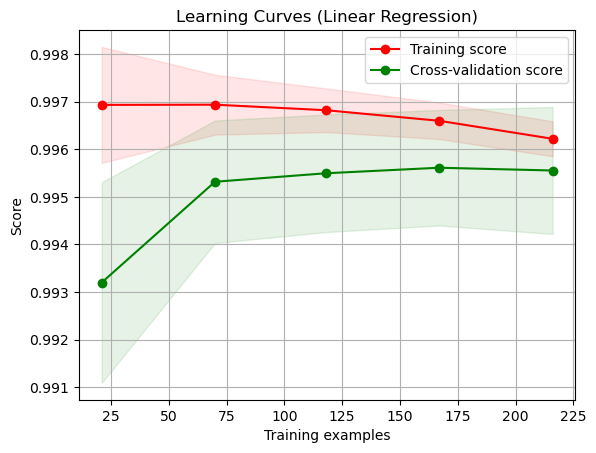

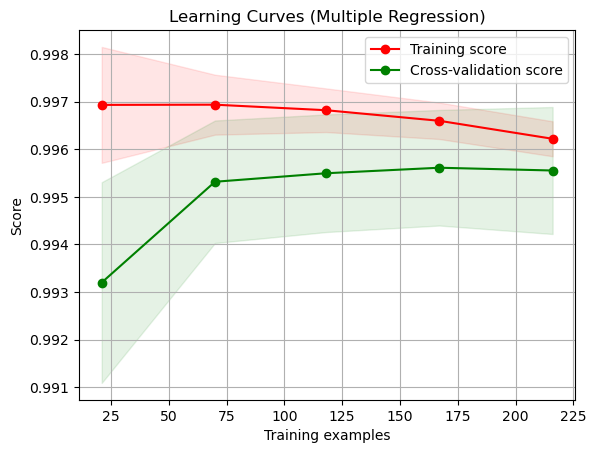

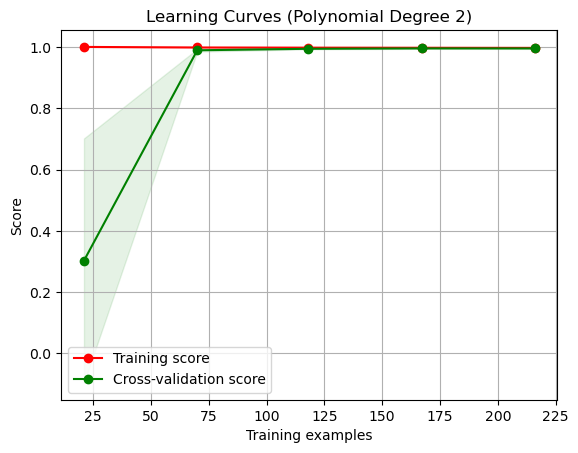

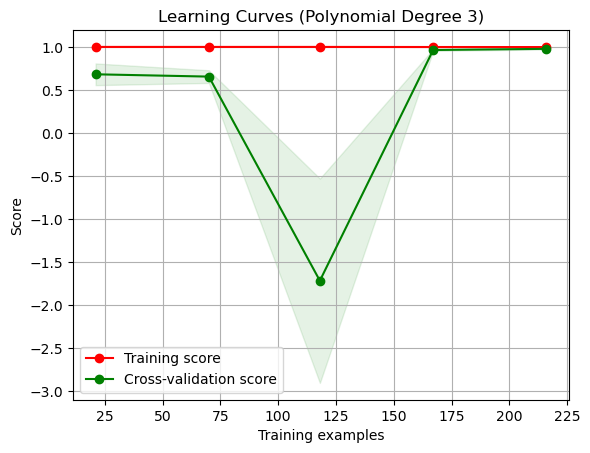

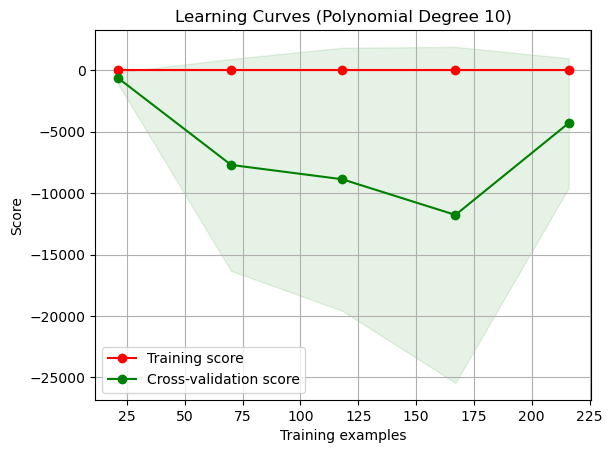

In [41]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# Функция построения кривых обучения
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Функция построения кривых валидации
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None, n_jobs=1):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, n_jobs=n_jobs)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    lw = 2
    plt.semilogx(param_range, train_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_mean - train_std,
                     train_mean + train_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_mean - test_std,
                     test_mean + test_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

title = "Learning Curves (Linear Regression)"
plot_learning_curve(linear_reg, title, x, y, cv=5)
plt.show()

title = "Learning Curves (Multiple Regression)"
plot_learning_curve(multiple_reg, title, x, y, cv=5)
plt.show()

for degree in degrees:
    title = f"Learning Curves (Polynomial Degree {degree})"
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(x)
    plot_learning_curve(LinearRegression(), title, X_poly, y, cv=5)
    plt.show()

Кривые обучения показывают, как производительность модели зависит от размера обучающего набора данных. Кривые валидации позволяют оценить, как изменение гиперпараметров влияет на производительность модели.

Если кривые обучения и валидации сходятся друг к другу и остаются близкими, это означает, что модель работает хорошо как на обучающем наборе данных, так и на валидационном наборе данных. Это признак того, что модель не переобучена и способна обобщать данные. Кривые обучения могут также помочь определить оптимальный размер обучающего набора. Если кривые сходятся, это может указывать на то, что дополнительные данные могут не принести значительное улучшение в производительности модели.

Применим кросс-валидацию, чтобы оценить, насколько модель стабильна и устойчива к изменениям в данных:

In [42]:
from sklearn.model_selection import cross_val_score

# Оценка стабильности с использованием кросс-валидации
def evaluate_model_stability(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    return scores

linear_reg_stability = evaluate_model_stability(linear_reg, x, y, cv=5)
multiple_reg_stability = evaluate_model_stability(multiple_reg, x, y, cv=5)

poly_reg_stability = {}
for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(x)
    poly_reg_stability[degree] = evaluate_model_stability(LinearRegression(), X_poly, y, cv=5)

print("Linear Regression Stability (R^2):", linear_reg_stability)
print("Multiple Regression Stability (R^2):", multiple_reg_stability)

for degree in degrees:
    print(f"Polynomial Degree {degree} Stability (R^2):", poly_reg_stability[degree])


Linear Regression Stability (R^2): [0.99416999 0.99765981 0.9965654  0.994751   0.9946185 ]
Multiple Regression Stability (R^2): [0.99416999 0.99765981 0.9965654  0.994751   0.9946185 ]
Polynomial Degree 2 Stability (R^2): [0.99349098 0.99728386 0.99633608 0.99430674 0.99391536]
Polynomial Degree 3 Stability (R^2): [0.98239751 0.98322398 0.98015693 0.96335832 0.97969592]
Polynomial Degree 10 Stability (R^2): [-14435.75002109  -1144.15717978   -952.60927121  -4528.58595644
   -408.94620801]


Кросс-валидация позволяет оценить производительность модели на нескольких разбиениях данных и усреднить результаты.  

Значения R^2 близки друг к другу на разных разбиениях во всех случаях, кроме полинома 10 степени, это может указывать на хорошую стабильность модели. Модель с полиномом 10 степени не стабильна, что может свидетельствовать о её переобучении.


#### В дополнение к коэффициенту детерминации (R-squared) рассмотрим другие метрики, которые могут быть полезны при оценке качества регрессионных моделей. 

Вот некоторые из наиболее распространенных метрик:

1. **Средняя абсолютная ошибка (MAE):** MAE измеряет среднее абсолютное отклонение между прогнозами модели и реальными значениями. Она измеряется в тех же единицах, что и зависимая переменная, и позволяет понять, насколько сильно модель ошибается в абсолютных величинах.

2. **Среднеквадратичная ошибка (MSE):** MSE измеряет среднее квадратичное отклонение между прогнозами модели и реальными значениями. Она также измеряется в квадратных единицах зависимой переменной и увеличивает вес больших ошибок.

3. **Корень из среднеквадратичной ошибки (RMSE):** RMSE представляет собой квадратный корень от MSE и измеряется в тех же единицах, что и зависимая переменная. Она дает представление о средней абсолютной ошибке модели.

4. **Коэффициент детерминации (Adjusted R-squared):** Этот коэффициент учитывает количество независимых переменных в модели и корректирует R-squared, чтобы избежать переоценки качества модели.

5. **Индекс AIC (Akaike Information Criterion) и BIC BIC (Bayesian Information Criterion):** Эти информационные критерии оценивают качество модели, учитывая сложность модели и количество используемых признаков. Нижние значения AIC и BIC указывают на лучшую модель.
    AIC прибавляет штрафное значение к логарифму правдоподобия модели на основе числа параметров в модели. Формула AIC: AIC = -2 * log-likelihood + 2 * k, где k - количество параметров в модели.
    BIC также добавляет штрафное значение к логарифму правдоподобия, но его штрафное значение строже, чем у AIC, и зависит от объема данных. Формула BIC: BIC = -2 * log-likelihood + k * log(n), где k - количество параметров в модели, n - объем данных.

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tools.eval_measures import aic

results = []

models = {
    "Линейная регрессия": LinearRegression(),
    "Множественная регрессия": multiple_reg,
}

degrees = [2, 3, 10]

for model_name, model in models.items():
    X_model = x
    model.fit(X_model, y)
    y_pred = model.predict(X_model)
    
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    aic_value = aic(y, y_pred, X_model.shape[1])
    
    results.append({
        'Модель': model_name,
        'RMSE': rmse,
        'AIC': aic_value
    })

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_model)
    model = LinearRegression()
    
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    aic_value = aic(y, y_pred, X_poly.shape[1])
    
    results.append({
        'Модель': f"{model_name} (Полином {degree})",
        'RMSE': rmse,
        'AIC': aic_value
    })

results_df = pd.DataFrame(results)
results_df

,Модель,RMSE,AIC
0,Линейная регрессия,9.686564e+00,0 0 85.801587 1 87.01773...
1,Множественная регрессия,9.686564e+00,0 0 85.801587 1 87.01773...
2,Множественная регрессия (Полином 2),9.028816e+00,0 0 143.801587 1 145.01773...
3,Множественная регрессия (Полином 3),7.154216e+00,0 0 311.801587 1 313.01773...
4,Множественная регрессия (Полином 10),6.420792e-10,0 0 38967.801587 1 38969...


### Контрольные вопросы

1. Как должны выглядеть данные для модели машинного обучения?

    Для модели машинного обучения, данные обычно представляются в виде матрицы признаков (X) и вектора целевых переменных (y). Матрица признаков содержит информацию о различных признаках или переменных, которые могут использоваться для прогнозирования целевой переменной. Вектор целевых переменных содержит значения, которые модель должна предсказать на основе предоставленных признаков.

1. В чем физический смысл коэфициентов линейной регрессии?

    Физический смысл коэффициентов линейной регрессии зависит от контекста задачи. Обычно коэффициенты представляют собой веса, которые модель присваивает каждому признаку. Например, в случае линейной регрессии для предсказания цены недвижимости, коэффициенты могут представлять величину влияния каждого признака, такого как площадь дома или количество спален, на конечную цену.

1. Чем множественная регрессия отличается от парной?

    Множественная регрессия отличается от парной тем, что в парной регрессии есть только один независимый признак, в то время как в множественной регрессии может быть несколько независимых признаков. Множественная регрессия позволяет моделировать влияние нескольких признаков на целевую переменную одновременно.

2. Какую функцию ошибки использует модель линейной регрессии?
    
    Модель линейной регрессии использует функцию ошибки, которая минимизирует сумму квадратов разницы между предсказанными значениями и фактическими значениями целевой переменной. Эта функция ошибки называется среднеквадратичной ошибкой (Mean Squared Error, MSE).

3. Какие метрики эффективности можно применять для оценки регрессионных моделей?

    Для оценки регрессионных моделей можно использовать различные метрики, включая:

- R-квадрат (R^2) - коэффициент детерминации, который измеряет объясненную дисперсию в данных моделью.
- Среднеквадратичная ошибка (MSE) - измеряет среднеквадратичное отклонение между предсказанными значениями и фактическими значениями.
- Средняя абсолютная ошибка (MAE) - измеряет среднее абсолютное отклонение между предсказанными значениями и фактическими значениями.
- Корень из среднеквадратичной ошибки (RMSE) - это корень из MSE и измеряет среднеквадратичное отклонение в исходных единицах измерения.
- Коэффициенты Пирсона и Спирмена - используются для измерения корреляции между предсказанными и фактическими значениями.

4. Какие еще регрессоры есть в библиотеке sklearn?

    Библиотека scikit-learn (sklearn) предоставляет различные регрессоры, включая LinearRegression, Ridge, Lasso, ElasticNet и многие другие.

1. Почему для визуализации модели нельзя использовать предсказанные значения по датасету?

    Для визуализации модели не рекомендуется использовать предсказанные значения по датасету, так как это может привести к переобучению модели. Вместо этого, рекомендуется разделить данные на обучающий и тестовый наборы, обучать модель на обучающем наборе и затем использовать тестовый набор для оценки
